In [2]:
!python -V

Python 3.10.9


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint,EarlyStopping

In [4]:
# seed 값 설정
np.random.seed(3)
tf.random.set_seed(3)

In [5]:
# 데이터 로드
df = pd.read_csv("dataset/housing.csv", delim_whitespace=True, header=None)

print(df.shape)
df.head()

(506, 14)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
dataset = df.values
print(dataset.shape)
dataset[0:5]

(506, 14)


array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00, 2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00, 2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00, 3.4700e+01],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00, 3.3400e+01],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00, 3.6200e+01]])

In [7]:
# 데이터 분리
X = dataset[:, 0:13]
y = dataset[:, 13]

# sklearn의 train_test_split 사용해서 test 데이터 생성
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

In [8]:
# 딥러닝 모델 선언
model = Sequential()
model.add(Dense(30, input_dim=13, activation='relu'))  # 입력층
                                                       # 은닉층1
    
model.add(Dense(25, activation='relu'))                # 은닉층2
model.add(Dense(15, activation='relu'))                # 은닉층3
model.add(Dense(6, activation='relu'))                 # 은닉층4
model.add(Dense(1))                                    # 출력층
# 선형 회귀는 마지막에 참과 거짓을 구분할 필요가 없음. 출력층에 활성화 함수를 지정할 필요도 없음

model.compile(loss='mean_squared_error',
              optimizer='adam', 
              metrics=['mse'])

In [9]:
# 모델 저장 폴더 만들기
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"

# 모델 업데이트 및 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_mse', 
                               verbose=1, save_best_only=True)

# 학습 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_mse', patience=100)

In [10]:
# 모델 학습
history = model.fit(X_train, y_train, 
                    validation_split=0.3, 
                    epochs=2000, 
                    batch_size=30, 
                    verbose=1, 
                    callbacks=[early_stopping_callback, checkpointer])

Epoch 1/2000
1/9 [==>...........................] - ETA: 11s - loss: 254.9194 - mse: 254.9194
Epoch 1: val_mse improved from inf to 86.77802, saving model to ./model\01-86.7780.hdf5
9/9 [==============================] - 2s 44ms/step - loss: 202.1654 - mse: 202.1654 - val_loss: 86.7780 - val_mse: 86.7780
Epoch 2/2000
1/9 [==>...........................] - ETA: 0s - loss: 69.2782 - mse: 69.2782
Epoch 2: val_mse improved from 86.77802 to 71.05354, saving model to ./model\02-71.0535.hdf5
9/9 [==============================] - 0s 13ms/step - loss: 76.3943 - mse: 76.3943 - val_loss: 71.0535 - val_mse: 71.0535
Epoch 3/2000
1/9 [==>...........................] - ETA: 0s - loss: 80.8285 - mse: 80.8285
Epoch 3: val_mse did not improve from 71.05354
9/9 [==============================] - 0s 8ms/step - loss: 70.4576 - mse: 70.4576 - val_loss: 72.9657 - val_mse: 72.9657
Epoch 4/2000
1/9 [==>...........................] - ETA: 0s - loss: 60.4732 - mse: 60.4732
Epoch 4: val_mse improved from 71.0535

1/9 [==>...........................] - ETA: 0s - loss: 41.1587 - mse: 41.1587
Epoch 30: val_mse improved from 42.83254 to 41.52848, saving model to ./model\30-41.5285.hdf5
9/9 [==============================] - 0s 12ms/step - loss: 43.5872 - mse: 43.5872 - val_loss: 41.5285 - val_mse: 41.5285
Epoch 31/2000
1/9 [==>...........................] - ETA: 0s - loss: 29.2761 - mse: 29.2761
Epoch 31: val_mse did not improve from 41.52848
9/9 [==============================] - 0s 7ms/step - loss: 45.1981 - mse: 45.1981 - val_loss: 46.2281 - val_mse: 46.2281
Epoch 32/2000
1/9 [==>...........................] - ETA: 0s - loss: 67.3256 - mse: 67.3256
Epoch 32: val_mse did not improve from 41.52848
9/9 [==============================] - 0s 8ms/step - loss: 44.0028 - mse: 44.0028 - val_loss: 41.7949 - val_mse: 41.7949
Epoch 33/2000
1/9 [==>...........................] - ETA: 0s - loss: 36.6235 - mse: 36.6235
Epoch 33: val_mse did not improve from 41.52848
9/9 [==============================] - 0s 8m

1/9 [==>...........................] - ETA: 0s - loss: 49.5701 - mse: 49.5701
Epoch 60: val_mse did not improve from 34.28165
9/9 [==============================] - 0s 8ms/step - loss: 32.2408 - mse: 32.2408 - val_loss: 35.4345 - val_mse: 35.4345
Epoch 61/2000
1/9 [==>...........................] - ETA: 0s - loss: 36.5738 - mse: 36.5738
Epoch 61: val_mse did not improve from 34.28165
9/9 [==============================] - 0s 8ms/step - loss: 30.6384 - mse: 30.6384 - val_loss: 37.3829 - val_mse: 37.3829
Epoch 62/2000
1/9 [==>...........................] - ETA: 0s - loss: 18.5924 - mse: 18.5924
Epoch 62: val_mse did not improve from 34.28165
9/9 [==============================] - 0s 7ms/step - loss: 30.5269 - mse: 30.5269 - val_loss: 37.3840 - val_mse: 37.3840
Epoch 63/2000
1/9 [==>...........................] - ETA: 0s - loss: 37.9586 - mse: 37.9586
Epoch 63: val_mse did not improve from 34.28165
9/9 [==============================] - 0s 7ms/step - loss: 35.1235 - mse: 35.1235 - val_los

Epoch 91/2000
1/9 [==>...........................] - ETA: 0s - loss: 24.9037 - mse: 24.9037
Epoch 91: val_mse did not improve from 30.99672
9/9 [==============================] - 0s 8ms/step - loss: 26.9589 - mse: 26.9589 - val_loss: 33.0216 - val_mse: 33.0216
Epoch 92/2000
1/9 [==>...........................] - ETA: 0s - loss: 33.4616 - mse: 33.4616
Epoch 92: val_mse did not improve from 30.99672
9/9 [==============================] - 0s 8ms/step - loss: 25.5739 - mse: 25.5739 - val_loss: 31.7961 - val_mse: 31.7961
Epoch 93/2000
1/9 [==>...........................] - ETA: 0s - loss: 36.3341 - mse: 36.3341
Epoch 93: val_mse did not improve from 30.99672
9/9 [==============================] - 0s 7ms/step - loss: 23.6924 - mse: 23.6924 - val_loss: 31.3089 - val_mse: 31.3089
Epoch 94/2000
1/9 [==>...........................] - ETA: 0s - loss: 23.7339 - mse: 23.7339
Epoch 94: val_mse did not improve from 30.99672
9/9 [==============================] - 0s 8ms/step - loss: 23.4113 - mse: 23.

1/9 [==>...........................] - ETA: 0s - loss: 18.3078 - mse: 18.3078
Epoch 121: val_mse did not improve from 27.55156
9/9 [==============================] - 0s 8ms/step - loss: 20.7283 - mse: 20.7283 - val_loss: 32.6502 - val_mse: 32.6502
Epoch 122/2000
1/9 [==>...........................] - ETA: 0s - loss: 16.5848 - mse: 16.5848
Epoch 122: val_mse did not improve from 27.55156
9/9 [==============================] - 0s 8ms/step - loss: 21.0301 - mse: 21.0301 - val_loss: 29.8503 - val_mse: 29.8503
Epoch 123/2000
1/9 [==>...........................] - ETA: 0s - loss: 23.7804 - mse: 23.7804
Epoch 123: val_mse improved from 27.55156 to 26.56929, saving model to ./model\123-26.5693.hdf5
9/9 [==============================] - 0s 12ms/step - loss: 19.8985 - mse: 19.8985 - val_loss: 26.5693 - val_mse: 26.5693
Epoch 124/2000
1/9 [==>...........................] - ETA: 0s - loss: 28.2141 - mse: 28.2141
Epoch 124: val_mse improved from 26.56929 to 25.23614, saving model to ./model\124-25

Epoch 152/2000
1/9 [==>...........................] - ETA: 0s - loss: 15.6538 - mse: 15.6538
Epoch 152: val_mse did not improve from 25.23614
9/9 [==============================] - 0s 7ms/step - loss: 18.6628 - mse: 18.6628 - val_loss: 28.4985 - val_mse: 28.4985
Epoch 153/2000
1/9 [==>...........................] - ETA: 0s - loss: 21.6018 - mse: 21.6018
Epoch 153: val_mse did not improve from 25.23614
9/9 [==============================] - 0s 8ms/step - loss: 16.4547 - mse: 16.4547 - val_loss: 45.1060 - val_mse: 45.1060
Epoch 154/2000
1/9 [==>...........................] - ETA: 0s - loss: 22.6848 - mse: 22.6848
Epoch 154: val_mse did not improve from 25.23614
9/9 [==============================] - 0s 7ms/step - loss: 23.0777 - mse: 23.0777 - val_loss: 28.4921 - val_mse: 28.4921
Epoch 155/2000
1/9 [==>...........................] - ETA: 0s - loss: 14.2499 - mse: 14.2499
Epoch 155: val_mse did not improve from 25.23614
9/9 [==============================] - 0s 7ms/step - loss: 24.9204 - 

Epoch 183/2000
1/9 [==>...........................] - ETA: 0s - loss: 19.3310 - mse: 19.3310
Epoch 183: val_mse did not improve from 24.89842
9/9 [==============================] - 0s 8ms/step - loss: 21.1060 - mse: 21.1060 - val_loss: 27.0797 - val_mse: 27.0797
Epoch 184/2000
1/9 [==>...........................] - ETA: 0s - loss: 8.7276 - mse: 8.7276
Epoch 184: val_mse did not improve from 24.89842
9/9 [==============================] - 0s 8ms/step - loss: 17.4010 - mse: 17.4010 - val_loss: 28.3050 - val_mse: 28.3050
Epoch 185/2000
1/9 [==>...........................] - ETA: 0s - loss: 9.3856 - mse: 9.3856
Epoch 185: val_mse did not improve from 24.89842
9/9 [==============================] - 0s 8ms/step - loss: 14.9717 - mse: 14.9717 - val_loss: 28.1255 - val_mse: 28.1255
Epoch 186/2000
1/9 [==>...........................] - ETA: 0s - loss: 23.7020 - mse: 23.7020
Epoch 186: val_mse improved from 24.89842 to 24.22343, saving model to ./model\186-24.2234.hdf5
9/9 [=====================

Epoch 214/2000
1/9 [==>...........................] - ETA: 0s - loss: 16.8179 - mse: 16.8179
Epoch 214: val_mse did not improve from 23.81997
9/9 [==============================] - 0s 8ms/step - loss: 13.6023 - mse: 13.6023 - val_loss: 28.6094 - val_mse: 28.6094
Epoch 215/2000
1/9 [==>...........................] - ETA: 0s - loss: 14.6494 - mse: 14.6494
Epoch 215: val_mse did not improve from 23.81997
9/9 [==============================] - 0s 7ms/step - loss: 14.2800 - mse: 14.2800 - val_loss: 31.1500 - val_mse: 31.1500
Epoch 216/2000
1/9 [==>...........................] - ETA: 0s - loss: 13.6819 - mse: 13.6819
Epoch 216: val_mse did not improve from 23.81997
9/9 [==============================] - 0s 8ms/step - loss: 13.6788 - mse: 13.6788 - val_loss: 25.0306 - val_mse: 25.0306
Epoch 217/2000
1/9 [==>...........................] - ETA: 0s - loss: 13.4184 - mse: 13.4184
Epoch 217: val_mse did not improve from 23.81997
9/9 [==============================] - 0s 7ms/step - loss: 13.4466 - 

1/9 [==>...........................] - ETA: 0s - loss: 9.5911 - mse: 9.5911
Epoch 245: val_mse did not improve from 23.81997
9/9 [==============================] - 0s 8ms/step - loss: 13.2556 - mse: 13.2556 - val_loss: 27.3730 - val_mse: 27.3730
Epoch 246/2000
1/9 [==>...........................] - ETA: 0s - loss: 16.0534 - mse: 16.0534
Epoch 246: val_mse did not improve from 23.81997
9/9 [==============================] - 0s 7ms/step - loss: 11.8620 - mse: 11.8620 - val_loss: 26.7178 - val_mse: 26.7178
Epoch 247/2000
1/9 [==>...........................] - ETA: 0s - loss: 6.6803 - mse: 6.6803
Epoch 247: val_mse did not improve from 23.81997
9/9 [==============================] - 0s 8ms/step - loss: 11.6695 - mse: 11.6695 - val_loss: 26.5721 - val_mse: 26.5721
Epoch 248/2000
1/9 [==>...........................] - ETA: 0s - loss: 12.0728 - mse: 12.0728
Epoch 248: val_mse did not improve from 23.81997
9/9 [==============================] - 0s 7ms/step - loss: 12.4784 - mse: 12.4784 - val_

1/9 [==>...........................] - ETA: 0s - loss: 7.6113 - mse: 7.6113
Epoch 276: val_mse did not improve from 23.81997
9/9 [==============================] - 0s 8ms/step - loss: 12.9415 - mse: 12.9415 - val_loss: 24.8804 - val_mse: 24.8804
Epoch 277/2000
1/9 [==>...........................] - ETA: 0s - loss: 14.3075 - mse: 14.3075
Epoch 277: val_mse did not improve from 23.81997
9/9 [==============================] - 0s 8ms/step - loss: 11.7713 - mse: 11.7713 - val_loss: 30.2647 - val_mse: 30.2647
Epoch 278/2000
1/9 [==>...........................] - ETA: 0s - loss: 9.3505 - mse: 9.3505
Epoch 278: val_mse did not improve from 23.81997
9/9 [==============================] - 0s 7ms/step - loss: 11.8420 - mse: 11.8420 - val_loss: 24.9127 - val_mse: 24.9127
Epoch 279/2000
1/9 [==>...........................] - ETA: 0s - loss: 5.6154 - mse: 5.6154
Epoch 279: val_mse did not improve from 23.81997
9/9 [==============================] - 0s 7ms/step - loss: 12.1427 - mse: 12.1427 - val_lo

In [11]:
# 예측 값과 실제 값의 비교
y_prediction = model.predict(X_test).flatten()
# flatten : 데이터 배열이 몇 차원이든 모두 1차원으로 바꿔 읽기 쉽게 해 주는 함수

# 10개 실제값과 예측값 비교
for i in range(10):
    label = y_test[i]
    prediction = y_prediction[i]
    print(label, "    ", prediction)

5/5 [==============================] - 0s 3ms/step
14.2      15.953257
15.6      18.447096
23.7      26.334473
20.4      23.590078
23.1      24.972622
50.0      51.45078
23.2      16.75565
36.0      32.751682
17.1      18.648365
14.1      11.5074


In [12]:
# 어느정도 실제값을 잘 예측하는 것을 알 수 있다.

# 시각화

In [13]:
# y_acc 에 학습 셋으로 측정한 정확도의 값을 저장
y_vmse = history.history['val_mse']
y_mse = history.history['mse']

# x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = np.arange(len(y_mse))
print('epoch 수:', len(x_len))

epoch 수: 293


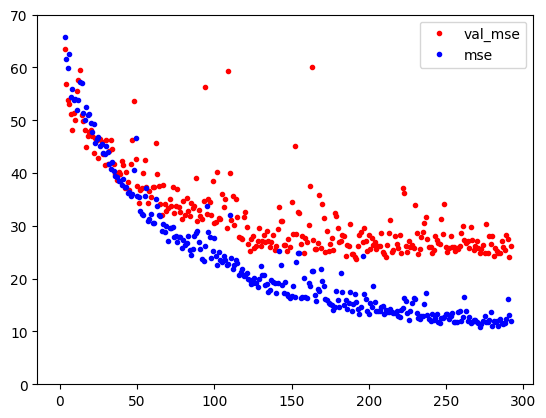

In [14]:
plt.plot(x_len, y_vmse, "o", c="red", markersize=3, label='val_mse')
plt.plot(x_len, y_mse, "o", c="blue", markersize=3, label='mse')

plt.legend()
plt.ylim(0, 70)

plt.show()